<a href="https://colab.research.google.com/github/MaarjaKo/wotech-learner-first/blob/main/13_07_2024_Python_individual_work_learning_from_Titanic_disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploratory Data Analysis (EDA):

Load the Titanic dataset into a Pandas DataFrame.
Use Pandas methods to explore and understand the dataset:
Display the first few rows to get an overview of the data structure.
Check the dimensions of the dataset (number of rows and columns).
Identify missing values and decide on strategies for handling them.
Compute basic statistics (e.g., mean, median, min, max) for numerical columns.
Analyze categorical variables (e.g., value counts).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.shape #dimensions of the dataset (number of rows and columns)

(891, 12)

In [ ]:
survival_counts = df['Survived'].value_counts().reset_index()
survival_counts.columns = ['Survived', 'Count']
survival_counts

,Survived,Count
0,0,549
1,1,342


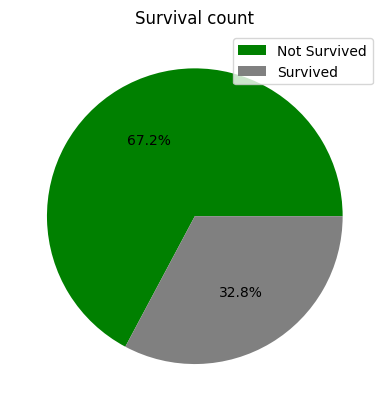

In [ ]:
survival_counts = df['Survived'].value_counts().reset_index()
survival_counts.columns = ['Survived', 'Count']
survival_counts

plt.pie(survival_counts['Count'],
        autopct='%1.1f%%',
        colors=['green', 'gray'])
plt.title('Survival count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


In [ ]:
df.info() #Identify missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df['Age'].value_counts(dropna=False)
df.isna() #ginary False = 0, True = 1

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.notna().all()
df.dropna(inplace=True)

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
basic_statistic = df[numerical_columns].agg(['mean', 'median', 'min', 'max']).reset_index()
basic_statistic

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,mean,455.36612,0.672131,1.191257,35.674426,0.464481,0.47541,78.682469
1,median,457.00000,1.000000,1.000000,36.000000,0.000000,0.00000,57.000000
2,min,2.00000,0.000000,1.000000,0.920000,0.000000,0.00000,0.000000
3,max,890.00000,1.000000,3.000000,80.000000,3.000000,4.00000,512.329200


Text(0, 0.5, 'Count')

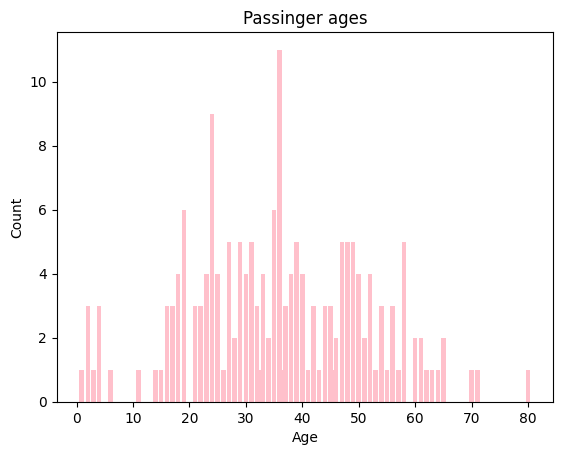

In [ ]:
df1 = df['Age'].value_counts(dropna=False).reset_index()
df1.columns = ['Age', 'Count']
plt.bar(df1['Age'], df1['Count'], color='pink')
plt.title('Passinger ages')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Gender')

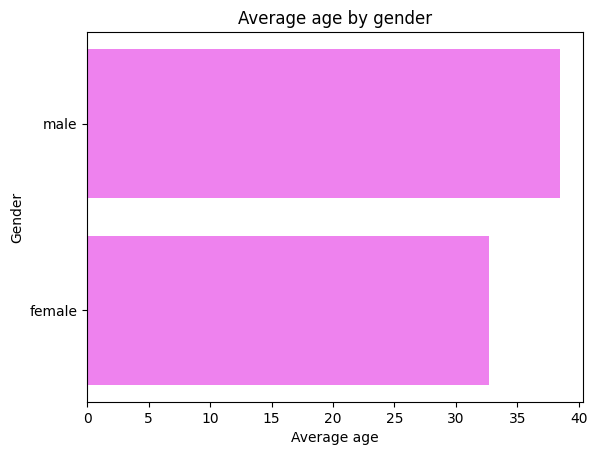

In [ ]:
average_age_bygender = df[["Sex", "Age"]].groupby("Sex").mean().reset_index()

plt.barh(average_age_bygender['Sex'], average_age_bygender['Age'], color='violet')
plt.title('Average age by gender')
plt.xlabel('Average age')
plt.ylabel('Gender')